# Q1

In [415]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [416]:
data = pd.read_csv("q1.csv")

In [417]:
data

,mother height,daughter height
0,58,60
1,62,60
2,60,58
3,64,60
4,67,70
5,70,72


In [418]:
X = data[['mother height']].values
y = data['daughter height'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [419]:
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  
    theta = np.random.randn(2, 1)  
    y = y.reshape(-1, 1)
    
    error_history = []
    
    for epoch in range(epochs):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= learning_rate * gradients
        y_pred = X_b.dot(theta)
        mse = mean_squared_error(y, y_pred)
        error_history.append(mse)
        
    return theta, error_history

theta, error_history = gradient_descent(X_train, y_train, learning_rate=0.0001, epochs=4)

print("Custom Gradient Descent Coefficients:")
print(f"Intercept: {theta[0][0]}")
print(f"Slope: {theta[1][0]}")

Custom Gradient Descent Coefficients:
Intercept: 1.7933397181221418
Slope: 0.9702427672491402


In [420]:
model = LinearRegression()
model.fit(X_train, y_train)

print("\nScikit-learn Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")


Scikit-learn Coefficients:
Intercept: -36.301369863013704
Slope: 1.5525114155251143


In [421]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"\nMean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 19.56798231896751
Root Mean Squared Error: 4.42357121780214


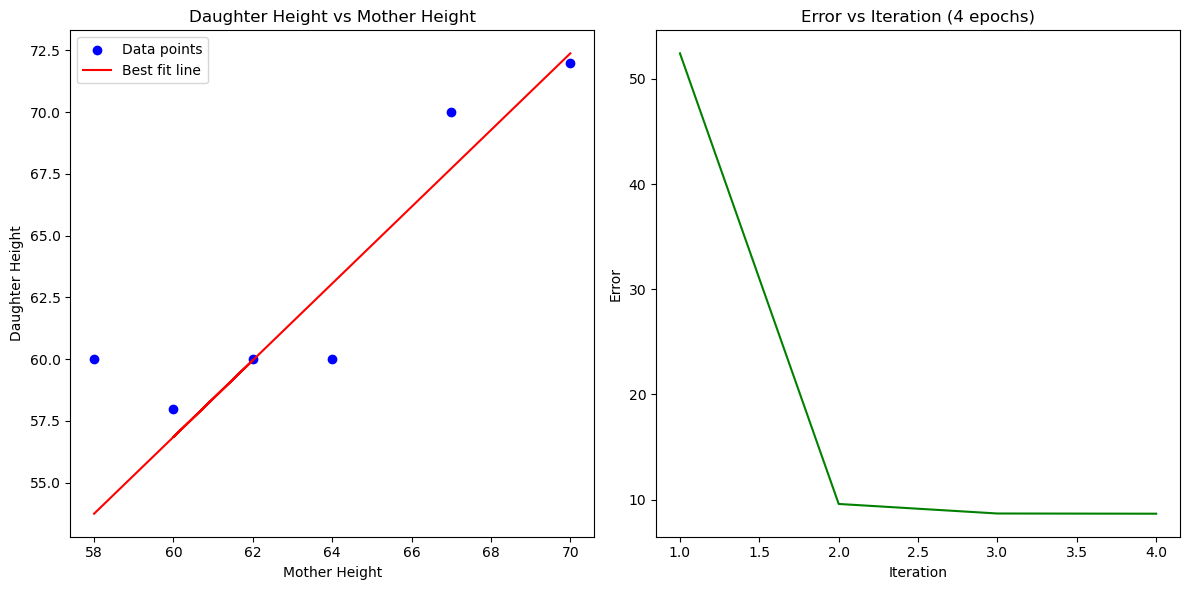

In [422]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', label='Best fit line')
plt.xlabel('Mother Height')
plt.ylabel('Daughter Height')
plt.legend()
plt.title('Daughter Height vs Mother Height')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(error_history) + 1), error_history, color='green')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error vs Iteration (4 epochs)')

plt.tight_layout()
plt.show()

In [423]:
new_mother_height = 63
X_new = np.array([[new_mother_height]])
X_new_b = np.c_[np.ones((1, 1)), X_new]  # add x0 = 1 for bias term
predicted_daughter_height = X_new_b.dot(theta)[0][0]
print(f"\nPredicted Daughter Height for Mother Height {new_mother_height}: {predicted_daughter_height}")


Predicted Daughter Height for Mother Height 63: 62.91863405481797


# Q2

In [424]:
df = pd.read_csv("q2.csv")

In [425]:
X = df[['Hours of Study']].values
y = df['Pass'].values

In [426]:
X_poly = np.hstack((np.ones((X.shape[0], 1)), X, X**2, X**3))  # Add polynomial features

theta = np.zeros(X_poly.shape[1])
alpha = 0.01
epochs = 1000
m = len(y)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    epsilon = 1e-15
    h = np.clip(h, epsilon, 1 - epsilon)
    cost = -1/m * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
    return cost

errors = []

for _ in range(epochs):
    predictions = sigmoid(X_poly.dot(theta))
    errors.append(compute_cost(theta, X_poly, y))
    gradient = X_poly.T.dot(predictions - y) / m
    theta -= alpha * gradient

print(f'Coefficients from gradient descent: {theta}')

Coefficients from gradient descent: [-0.43317752 -0.75524637 -1.25588013  0.31577762]


In [427]:
model = LogisticRegression(solver='lbfgs', fit_intercept=False)
model.fit(X_poly, y)
print(f'Coefficients from sklearn: {model.intercept_[0]:.4f}, {model.coef_[0][0]:.4f}')

Coefficients from sklearn: 0.0000, -0.3312


In [428]:
def predict_probability(hours, theta):
    X_new = np.array([1, hours, hours**2, hours**3])
    return sigmoid(X_new.dot(theta))

def predict_class(probability):
    return 1 if probability >= 0.5 else 0

y_pred_prob_3_5 = predict_probability(3.5, theta)
y_pred_class_3_5 = predict_class(y_pred_prob_3_5)
print(f'Probability of passing with 3.5 hours of study: {y_pred_prob_3_5:.4f}')
print(f'Class prediction for 3.5 hours of study: {y_pred_class_3_5}')

Probability of passing with 3.5 hours of study: 0.0072
Class prediction for 3.5 hours of study: 0


In [429]:
y_pred_prob_7_5 = predict_probability(7.5, theta)
y_pred_class_7_5 = predict_class(y_pred_prob_7_5)
print(f'Probability of passing with 7.5 hours of study: {y_pred_prob_7_5:.4f}')
print(f'Class prediction for 7.5 hours of study: {y_pred_class_7_5}')

Probability of passing with 7.5 hours of study: 1.0000
Class prediction for 7.5 hours of study: 1


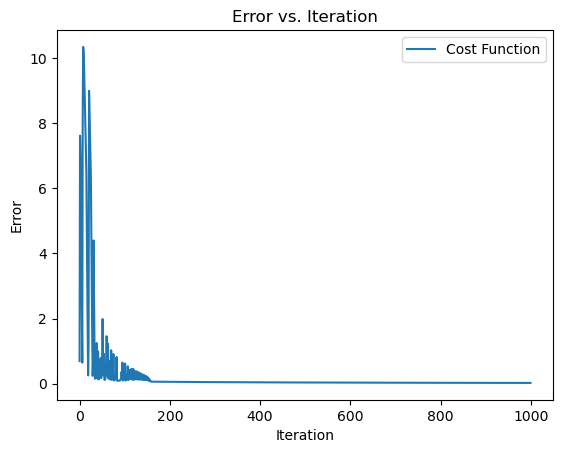

Accuracy after gradient descent: 1.00


In [430]:
plt.plot(range(epochs), errors, label='Cost Function')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error vs. Iteration')
plt.legend()
plt.show()

probabilities = sigmoid(X_poly.dot(theta))
predicted_classes = (probabilities >= 0.5).astype(int)
accuracy = np.mean(predicted_classes == y)
print(f'Accuracy after gradient descent: {accuracy:.2f}')


# Q3

Coefficients from gradient descent: [ 0.49197429  0.51948117  0.01935242  0.57834337 -0.02649819  0.61297932
 -0.47941762]
Accuracy after gradient descent: 1.00


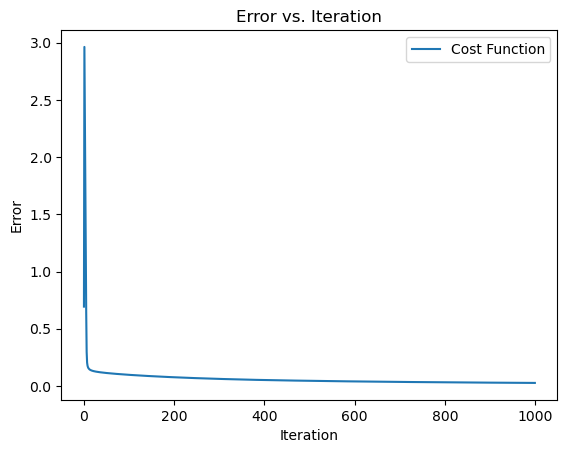

In [438]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = {
    'X1': [4, 2, 1, 3, 1, 6],
    'X2': [1, 8, 0, 2, 4, 7],
    'Y': [2, -14, 1, -1, -7, -8]
}

df = pd.DataFrame(data)

df['Y_binary'] = (df['Y'] > -2).astype(int)

X = df[['X1', 'X2']].values
y = df['Y_binary'].values

X_poly = np.hstack((np.ones((X.shape[0], 1)), X, X**2, X**3))

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

theta = np.zeros(X_train.shape[1])
alpha = 0.01
epochs = 1000
m = len(y_train)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    epsilon = 1e-10
    h = np.clip(h, epsilon, 1 - epsilon)
    cost = -1/m * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
    return cost

errors = []
for _ in range(epochs):
    predictions = sigmoid(X_train.dot(theta))
    errors.append(compute_cost(theta, X_train, y_train))
    gradient = X_train.T.dot(predictions - y_train) / m
    theta -= alpha * gradient

print(f'Coefficients from gradient descent: {theta}')

probabilities = sigmoid(X_test.dot(theta))
predicted_classes = (probabilities >= 0.5).astype(int)

accuracy = np.mean(predicted_classes == y_test)
print(f'Accuracy after gradient descent: {accuracy:.2f}')

plt.plot(range(epochs), errors, label='Cost Function')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error vs. Iteration')
plt.legend()
plt.show()
